In [1]:
import pandas as pd
import numpy as np
import os

In [20]:
raw_data_path= os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [22]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [23]:
type(train_df)

pandas.core.frame.DataFrame

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [27]:
test_df['Survived']=-888

In [43]:
df = pd.concat((train_df,test_df),sort=False,axis=0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [45]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
df.tail(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [48]:
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [1]:
df[['Name','Age']]

NameError: name 'df' is not defined

In [50]:
df.loc[5:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [54]:
male_passengers = df.loc[((df.Sex=='male') & (df.Survived==0)),]
print('Num {0}'.format(len(male_passengers)))

Num 468


In [58]:
dead = df.loc[(df.Survived!=1),]
print('Num {0}'.format(len(dead)))

Num 967


In [59]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [60]:
df.Fare.mean()

33.2954792813456

In [61]:
df.Fare.max()

512.3292

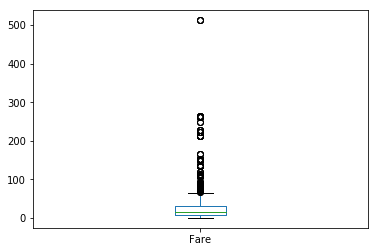

In [64]:
df.Fare.plot(kind='box')